*Note: This code was a team effort by Group 1.*

# **Mutlilevel Analysis**

In order to perform a multilevel analysis, the Pymer4 tool has been used, as proposed by Jolly (2018).

Reference:
Jolly, (2018). Pymer4: Connecting R and Python for Linear Mixed Modeling. Journal of Open Source Software, 3(31), 862, https://doi.org/10.21105/joss.00862

In [26]:
# import some basic libraries
import os
import pandas as pd

os.environ["R_HOME"] = "/Library/Frameworks/R.framework/Resources"

## **1. Preparing the data**

### 1.1 Combining all the new features and adding them to the original dataset

In [27]:
# Reading the main dataset that was created for our project
original_df = pd.read_csv('combined_themepark_dataset.csv')

# Reading the csv files that have been exported from the different hypotheses testing processes, including the new engineered features

H1_data = pd.read_csv('https://raw.githubusercontent.com/crlhbs/Group1_MarketingStrategy/main/02_new%20dataframes/H1_dataframe.csv')
H2_data = pd.read_csv('https://raw.githubusercontent.com/crlhbs/Group1_MarketingStrategy/main/02_new%20dataframes/H2_dataframe.csv')
H3_data = pd.read_csv('https://raw.githubusercontent.com/crlhbs/Group1_MarketingStrategy/main/02_new%20dataframes/H3_dataframe.csv')
H4_data = pd.read_csv('https://raw.githubusercontent.com/crlhbs/Group1_MarketingStrategy/main/02_new%20dataframes/H4_dataframe.csv')

In [28]:
# Merge the required columns from H2_data to original_df based on 'post_id'
original_df = pd.merge(original_df, H2_data[['post_id', 'post_type']], on='post_id', how='left')

# Display the first few rows of the merged DataFrame
original_df.head(1)

,date,profile,message,nr_reactions,nr_comments,nr_shares,comments/post,post_interaction_rate,engagement,nr_likes,link_posts,picture_posts,video_posts,profile_id,post_id,link,followers,weighted_engagement,post_type
0,12/31/23 9:40 PM,wild adventures theme park,🎟️🚨 Today's the FINAL day to use your 2023 Sea...,16,2,2,2,NaN,1.090000e+12,13,NaN,1.0,NaN,84679583132,84679583132_770120045161180,https://www.facebook.com/617429960430190/posts...,low,23,picture


In [29]:
original_df.head(1)

,date,profile,message,nr_reactions,nr_comments,nr_shares,comments/post,post_interaction_rate,engagement,nr_likes,link_posts,picture_posts,video_posts,profile_id,post_id,link,followers,weighted_engagement,post_type
0,12/31/23 9:40 PM,wild adventures theme park,🎟️🚨 Today's the FINAL day to use your 2023 Sea...,16,2,2,2,NaN,1.090000e+12,13,NaN,1.0,NaN,84679583132,84679583132_770120045161180,https://www.facebook.com/617429960430190/posts...,low,23,picture


In [30]:
# Merge the required columns from H4_data to original_df based on 'post_id'
original_df = pd.merge(original_df, H4_data[['post_id', 'has_emoji']], on='post_id', how='left')

# Display the first few rows of the merged DataFrame
original_df.head(1)

,date,profile,message,nr_reactions,nr_comments,nr_shares,comments/post,post_interaction_rate,engagement,nr_likes,link_posts,picture_posts,video_posts,profile_id,post_id,link,followers,weighted_engagement,post_type,has_emoji
0,12/31/23 9:40 PM,wild adventures theme park,🎟️🚨 Today's the FINAL day to use your 2023 Sea...,16,2,2,2,NaN,1.090000e+12,13,NaN,1.0,NaN,84679583132,84679583132_770120045161180,https://www.facebook.com/617429960430190/posts...,low,23,picture,1


In [31]:
original_df.head(1)

,date,profile,message,nr_reactions,nr_comments,nr_shares,comments/post,post_interaction_rate,engagement,nr_likes,link_posts,picture_posts,video_posts,profile_id,post_id,link,followers,weighted_engagement,post_type,has_emoji
0,12/31/23 9:40 PM,wild adventures theme park,🎟️🚨 Today's the FINAL day to use your 2023 Sea...,16,2,2,2,NaN,1.090000e+12,13,NaN,1.0,NaN,84679583132,84679583132_770120045161180,https://www.facebook.com/617429960430190/posts...,low,23,picture,1


In [32]:
# Merging the required columns from H3_data to original_df based on 'post_id'
original_df = pd.merge(original_df, H3_data[['post_id', 'sentiment']], on='post_id', how='left')

# Display the first few rows of the merged DataFrame
original_df.head(1)

,date,profile,message,nr_reactions,nr_comments,nr_shares,comments/post,post_interaction_rate,engagement,nr_likes,...,picture_posts,video_posts,profile_id,post_id,link,followers,weighted_engagement,post_type,has_emoji,sentiment
0,12/31/23 9:40 PM,wild adventures theme park,🎟️🚨 Today's the FINAL day to use your 2023 Sea...,16,2,2,2,NaN,1.090000e+12,13,...,1.0,NaN,84679583132,84679583132_770120045161180,https://www.facebook.com/617429960430190/posts...,low,23,picture,1,positive


In [33]:
# Merging the required columns from H3_data to original_df based on 'post_id'
original_df = pd.merge(original_df, H1_data[['post_id', 'day_of_week', 'time_of_day']], on='post_id', how='left')

# Display the first few rows of the merged DataFrame
original_df.head(1)

,date,profile,message,nr_reactions,nr_comments,nr_shares,comments/post,post_interaction_rate,engagement,nr_likes,...,profile_id,post_id,link,followers,weighted_engagement,post_type,has_emoji,sentiment,day_of_week,time_of_day
0,12/31/23 9:40 PM,wild adventures theme park,🎟️🚨 Today's the FINAL day to use your 2023 Sea...,16,2,2,2,NaN,1.090000e+12,13,...,84679583132,84679583132_770120045161180,https://www.facebook.com/617429960430190/posts...,low,23,picture,1,positive,Sunday,Afternoon


### Checking, if the final combined dataframe looks fine

In [34]:
original_df

,date,profile,message,nr_reactions,nr_comments,nr_shares,comments/post,post_interaction_rate,engagement,nr_likes,...,profile_id,post_id,link,followers,weighted_engagement,post_type,has_emoji,sentiment,day_of_week,time_of_day
0,12/31/23 9:40 PM,wild adventures theme park,🎟️🚨 Today's the FINAL day to use your 2023 Sea...,16,2,2,2,NaN,1.090000e+12,13,...,84679583132,84679583132_770120045161180,https://www.facebook.com/617429960430190/posts...,low,23,picture,1,positive,Sunday,Afternoon
1,12/31/23 8:01 PM,fun spot america,See you next year! 😉 Don’t miss...,38,1,2,1,NaN,4.170000e+11,33,...,"1,8402E+11",184020466977_767286052104076,https://www.facebook.com/653224623510220/posts...,medium,41,other,1,positive,Sunday,Afternoon
2,12/31/23 7:30 PM,fun spot america,Don't miss our HUGE firework display ! 🥳\n\n#f...,23,2,3,2,NaN,2.850000e+11,21,...,"1,8402E+11",184020466977_767267948772553,https://www.facebook.com/653224623510220/posts...,medium,34,video,1,positive,Sunday,Afternoon
3,12/31/23 7:00 PM,disneyland paris,Fijne jaarwisseling! 🥂🎉\nEn tot volgend jaar 😉,646,52,12,56,NaN,1.360000e+11,478,...,"6,52389E+14",652389081615295_775974521237956,https://www.facebook.com/724434559725286/posts...,high,618,picture,1,neutral,Sunday,Evening
4,12/31/23 7:00 PM,silverwood theme park,It's the last day of our New Year's Sale! Save...,17,2,0,2,NaN,4.960000e+11,16,...,"7,62702E+14",762701550509617_678920137770716,https://www.facebook.com/562559642740100/posts...,medium,20,video,0,positive,Sunday,Morning
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18288,01/01/2023 02:00,wild adventures theme park,LAST CHANCE! \n\nPrices on 2023 Season Passes ...,20,1,0,2,NaN,1.250000e+11,20,...,84679583132,84679583132_10159284713193133,https://www.facebook.com/WildAdventures/photos...,low,22,picture,0,positive,Saturday,Evening
18289,01/01/2023 01:20,playland,O Grupo Playcenter e os Parques Playcenter Fam...,7,1,0,1,NaN,2.460000e+09,7,...,"1,70866E+14",170865866397863_2401446080006486,https://www.facebook.com/170865866397863/posts...,low,9,picture,1,neutral,Saturday,Evening
18290,01/01/2023 00:01,disneyland paris,Gelukkig 2023! Laat de magie dit jaar stralen ...,833,40,31,44,NaN,1.750000e+12,621,...,"6,52389E+14",652389081615295_2176203019233886,https://www.facebook.com/652389081615295/posts...,high,794,video,1,neutral,Sunday,Morning
18291,01/01/2023 00:00,six flags over georgia & hurricane harbor,What are your 2023 New Years resolutions? ✨\n\...,58,7,2,9,NaN,1.420000e+12,49,...,34284255238,34284255238_10160187479800239,https://www.facebook.com/sixflagsovergeorgia/p...,medium,69,picture,1,positive,Saturday,Evening


# **2. Creating a multi-level model**

### 2.1 Setting up the model with the features from the hypotheses of this project

In [35]:
from pymer4.models import Lmer

In [36]:
# Define the formula for the multilevel regression model with varying slopes
#formula = 'weighted_engagement ~ post_type + has_emoji + sentiment + day_of_week + time_of_day + (1 + post_type + has_emoji + sentiment + day_of_week + time_of_day | followers)'

# Create an instance of the Lmer model
#model = Lmer(formula, data=original_df)

# Fit the model to the data
#model.fit()

In [37]:
# Define the formula for the multilevel regression model with varying slopes
#formula = 'weighted_engagement ~ post_type + has_emoji + sentiment + day_of_week + time_of_day + (1 + post_type + has_emoji + sentiment + day_of_week + time_of_day | followers)'

# Create an instance of the Lmer model
#model = Lmer(formula, data=original_df)

# Fit the model to the data
#model.fit()

In [38]:
# Define the formula for the multilevel regression model with varying slopes
formula = 'weighted_engagement ~ post_type + has_emoji + sentiment + day_of_week + time_of_day + (1 + post_type|followers) + (1 + has_emoji|followers) + (1 + sentiment|followers) + (1 + day_of_week|followers) + (1 + time_of_day|followers)'

# Create an instance of the Lmer model
model = Lmer(formula, data=original_df)

# Fit the model to the data
model.fit()

boundary (singular) fit: see help('isSingular') 

Linear mixed model fit by REML [’lmerMod’]
Formula: weighted_engagement~post_type+has_emoji+sentiment+day_of_week+time_of_day+(1+post_type|followers)+(1+has_emoji|followers)+(1+sentiment|followers)+(1+day_of_week|followers)+(1+time_of_day|followers)

Family: gaussian	 Inference: parametric

Number of observations: 18293	 Groups: {'followers': 3.0}

Log-likelihood: -176963.346 	 AIC: 354054.692

Random effects:

                             Name           Var       Std
followers             (Intercept)  4.007920e+02    20.020
followers        post_typepicture  1.201912e+04   109.632
followers          post_typevideo  5.386057e+05   733.898
followers.1           (Intercept)  0.000000e+00     0.000
followers.1             has_emoji  6.084768e+04   246.673
followers.2           (Intercept)  3.712887e+04   192.689
followers.2      sentimentneutral  1.340695e+05   366.155
followers.2     sentimentpositive  6.439030e+04   253.752
followers.3  

,Estimate,2.5_ci,97.5_ci,SE,DF,T-stat,P-val,Sig
(Intercept),370.204,-352.204,1092.612,368.582,1.551,1.004,0.446,
post_typepicture,34.888,-198.656,268.432,119.157,3.141,0.293,0.788,
post_typevideo,514.160,-351.352,1379.673,441.596,1.955,1.164,0.367,
has_emoji,-126.268,-430.061,177.524,154.999,1.954,-0.815,0.503,
sentimentneutral,223.836,-270.235,717.907,252.082,1.861,0.888,0.474,
sentimentpositive,152.364,-225.366,530.094,192.723,1.986,0.791,0.513,
day_of_weekMonday,-52.728,-363.136,257.680,158.374,2.184,-0.333,0.768,
day_of_weekSaturday,-363.597,-1060.815,333.621,355.730,1.927,-1.022,0.418,
day_of_weekSunday,-107.400,-561.395,346.596,231.634,1.956,-0.464,0.689,
day_of_weekThursday,47.123,-143.079,237.325,97.044,7.591,0.486,0.641,


In [39]:
# Extract fixed effects
fixed_effects = model.coefs

fixed_effects

,Estimate,2.5_ci,97.5_ci,SE,DF,T-stat,P-val,Sig
(Intercept),370.203744,-352.204371,1092.611859,368.582342,1.550608,1.004399,0.445991,
post_typepicture,34.888189,-198.656055,268.432433,119.157416,3.141420,0.292791,0.787964,
post_typevideo,514.160353,-351.352316,1379.673023,441.596211,1.955417,1.164322,0.366716,
has_emoji,-126.268478,-430.060753,177.523797,154.998907,1.953876,-0.814641,0.502592,
sentimentneutral,223.835879,-270.235038,717.906796,252.081631,1.861351,0.887950,0.474185,
sentimentpositive,152.364095,-225.365633,530.093822,192.722790,1.986474,0.790587,0.512530,
day_of_weekMonday,-52.727890,-363.135942,257.680161,158.374365,2.184096,-0.332932,0.768460,
day_of_weekSaturday,-363.597304,-1060.815388,333.620780,355.730049,1.927287,-1.022116,0.417673,
day_of_weekSunday,-107.399547,-561.394726,346.595632,231.634450,1.955919,-0.463660,0.689362,
day_of_weekThursday,47.122622,-143.079267,237.324512,97.043564,7.590929,0.485582,0.640967,


In [40]:
# Get group level coefficients (just the first 5)
# Each row here is a unique intercept and slope
# which vary because we parameterized our rfx that way above
model.fixef.head(5)

,(Intercept),post_typepicture,post_typevideo,has_emoji,sentimentneutral,sentimentpositive,day_of_weekMonday,day_of_weekSaturday,day_of_weekSunday,day_of_weekThursday,day_of_weekTuesday,day_of_weekWednesday,time_of_dayEvening,time_of_dayMorning
high,432.440835,156.091743,1329.435353,-389.966212,581.687659,400.362188,-286.526456,-1026.608385,-499.984979,113.210843,-333.039873,9.883271,-112.375864,1091.090781
low,326.854674,-45.119029,-25.572224,-11.368605,32.649920,19.868590,57.816929,-50.111872,78.222872,15.874639,70.004692,7.079896,59.717351,-45.338357
medium,351.315722,-6.308147,238.617931,22.529384,57.170058,36.861505,70.525855,-14.071655,99.563466,12.282385,84.880005,6.976641,50.140954,17.900106


### Get group level deviates from population level coefficients (i.e. rfx)

In [41]:
# Extract random effects
random_effects = model.ranef

random_effects

,X.Intercept.,post_typepicture,post_typevideo,X.Intercept..1,has_emoji,X.Intercept..2,sentimentneutral,sentimentpositive,X.Intercept..3,day_of_weekMonday,day_of_weekSaturday,day_of_weekSunday,day_of_weekThursday,day_of_weekTuesday,day_of_weekWednesday,X.Intercept..4,time_of_dayEvening,time_of_dayMorning
high,12.447418,121.203554,815.274999,0.0,-263.697734,-188.318920,357.851780,247.998094,0.0,-233.798565,-663.011081,-392.585432,66.088221,-273.654814,1.903335,618.792482,-111.536678,736.539938
low,-8.669814,-80.007218,-539.732577,0.0,114.899873,100.611290,-191.185959,-132.495504,0.0,110.544820,313.485432,185.622419,-31.247984,129.389751,-0.900040,-335.960634,60.556537,-399.889201
medium,-3.777604,-41.196336,-275.542422,0.0,148.797862,87.707629,-166.665821,-115.502589,0.0,123.253746,349.525649,206.963013,-34.840237,144.265064,-1.003295,-282.831848,50.980140,-336.650737


<Axes: xlabel='Estimate'>

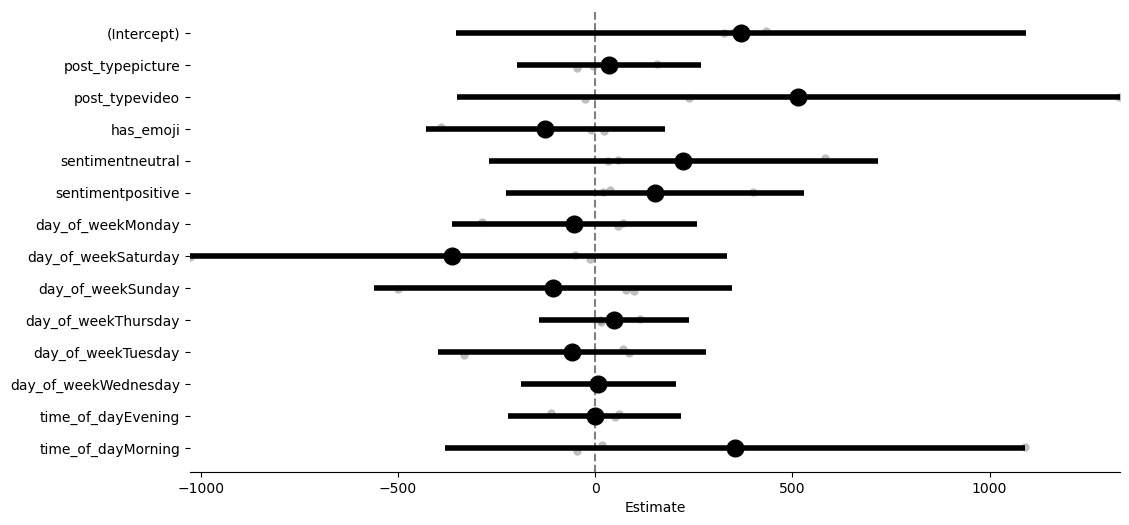

In [42]:
# Visualize coefficients with group/cluster fits overlaid ("forest plot")
model.plot_summary()

In [43]:
# Create a DataFrame to store the results
result_df = pd.DataFrame()

# Populate the DataFrame with fixed effects
result_df['Main effects Estimate'] = fixed_effects['Estimate'].values
result_df['SE'] = fixed_effects['SE'].values

# Populate the DataFrame with random effects
for group, effect in random_effects.items():
    result_df[f'Random effect {group}'] = effect

# Add Intercept row
result_df.loc['(Intercept)'] = [fixed_effects.loc['(Intercept)', 'Estimate'], fixed_effects.loc['(Intercept)', 'SE']] + [0] * (len(random_effects) - 1)

# Reorder columns
result_df = result_df[['Main effects Estimate', 'SE'] + [col for col in result_df.columns if col not in ['Main effects Estimate', 'SE']]]

# Print the results table
print(result_df)

ValueError: cannot set a row with mismatched columns

In [ ]:
# Plot coefficients for each group/cluster as separate regressions
model.plot("has_emoji", plot_ci=True, ylabel="predicted engagement")

In [ ]:
# Plot coefficients for each group/cluster as separate regressions
model.plot("post_type", plot_ci=True, ylabel="predicted engagement")

In [ ]:
# Plot coefficients for each group/cluster as separate regressions
model.plot("sentiment", plot_ci=True, ylabel="predicted engagement")

### 2.2 Interpretation of results

to be done

####
